In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import GridSearchCV

In [14]:
?confusion_matrix

In [22]:
confusion_matrix([1, 2, 2, 2], [0, 1, 0, 1])

array([[0, 0, 0],
       [1, 0, 0],
       [1, 2, 0]], dtype=int64)

In [15]:
confusion_matrix([15,30], [15,40])

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 0]], dtype=int64)

In [45]:
precision_score([15,30], 
                [15,40], average="micro")

0.5

In [46]:
precision_score([15,30], 
                [15,40], average="macro")

D:\Programs\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3333333333333333

In [33]:
confusion_matrix([15,30,40,30,15,30,15,30,40,30,15,40,40,40], [15,40,15,15,30,40,30,40,30,30,15,40,40,40])

array([[2, 2, 0],
       [1, 1, 3],
       [1, 1, 3]], dtype=int64)

In [40]:
(1/2 + 1/4 + 1/2)/3

0.4166666666666667

In [42]:
6/(1+1+1+3+2+6)

0.42857142857142855

In [43]:
precision_score([15,30,40,30,15,30,15,30,40,30,15,40,40,40], 
                [15,40,15,15,30,40,30,40,30,30,15,40,40,40], average="micro")

0.42857142857142855

In [41]:
precision_score([15,30,40,30,15,30,15,30,40,30,15,40,40,40], 
                [15,40,15,15,30,40,30,40,30,30,15,40,40,40], average="macro")

0.4166666666666667

In [3]:
?precision_score

In [12]:
precision = precision_score([15,30], [15,40],average='micro')
recall = precision_score([15,30], [15,40],average='macro')

D:\Programs\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
precision

0.0

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})


In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [6]:
clf = clf.fit(X, y)

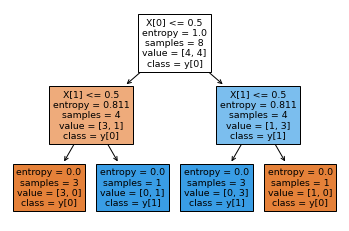

In [10]:
plt.figure()
tree.plot_tree(clf, filled=True, class_names=True);

In [12]:
cats = pd.read_csv('cats.csv', index_col=0)
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [39]:
clfb = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
X = cats.iloc[:, 0:3]
y = cats.iloc[:, 3]

In [23]:
X.columns

Index(['Шерстист', 'Гавкает', 'Лазает по деревьям'], dtype='object')

In [30]:
y.to_dict()

{0: 'собачка',
 1: 'собачка',
 2: 'собачка',
 3: 'собачка',
 4: 'котик',
 5: 'котик',
 6: 'котик',
 7: 'котик',
 8: 'котик',
 9: 'котик'}

In [41]:
clf = clfb.fit(X.iloc[:, [0]], y)

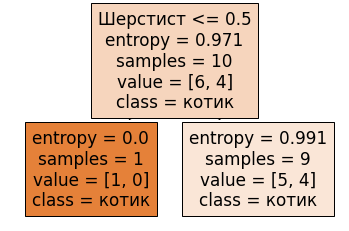

In [42]:
fig1 = plt.figure()
tree.plot_tree(clf, 
               filled=True, 
               feature_names=X.columns, 
               class_names={1: 'собачка', 0: 'котик'});

In [36]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [68]:
def entropy(n1, n2):
    if not n1 or not n2:
        return 0
    p1 = n1/(n1+n2)
    p2 = n2/(n1+n2)
    return - p1*np.log2(p1) - p2*np.log2(p2)

In [69]:
def igain(E0, n1, n2, n3, n4):
    N = n1 + n2 + n3 + n4
    E1 = entropy(n1, n2)
    E2 = entropy(n3, n4)
    return E0 - E1*(n1+n2)/N - E2*(n3+n4)/N

In [70]:
E0 = entropy(4, 6)
E0

0.9709505944546686

Шертист < 0.5
да - соб: 0, кот: 1 entropy = - 0 log 0 - 1 log 1 = 0 
нет- соб: 4, кот: 5 entropy = -4/9 log4/9 -5/9 log 5/9 = 0.991

In [72]:
igain(E0, 0, 1, 4, 5)

0.07898214060026854

Лазает < 0.5
да - соб: 4, кот: 0 entropy = - 1 log 1 - 0 log 0 = 0 
нет- соб: 0, кот: 6 entropy = -0 log0 - 1 log 1 = 0

In [76]:
igain(E0, 4, 0, 0, 6)

0.9709505944546686

Гавкает < 0.5
да - соб: 0, кот: 5 entropy = - 0 log 0 - 1 log 1 = 0 
нет- соб: 4, кот: 1 entropy = -4/5 log4/5 -1/5 log 1/5 = 0.722

In [78]:
igain(E0, 0, 5, 4, 1)

0.6099865470109874

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## songs

In [48]:
songs = pd.read_csv('songs.csv')
songs

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [52]:
X = songs.loc[:, ['length', 'commas', 'exclamations', 'colons', 'hyphens']]
X

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3
...,...,...,...,...,...
355,972,2,0,0,1
356,1283,33,0,0,3
357,810,1,0,0,0
358,1996,34,0,0,5


In [51]:
y = songs.artist
y

0           gangstarr
1      blind-guardian
2      blind-guardian
3      blind-guardian
4           gangstarr
            ...      
355              abba
356              abba
357              abba
358         gangstarr
359              abba
Name: artist, Length: 360, dtype: object

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [101]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred, average='micro')

0.7333333333333333

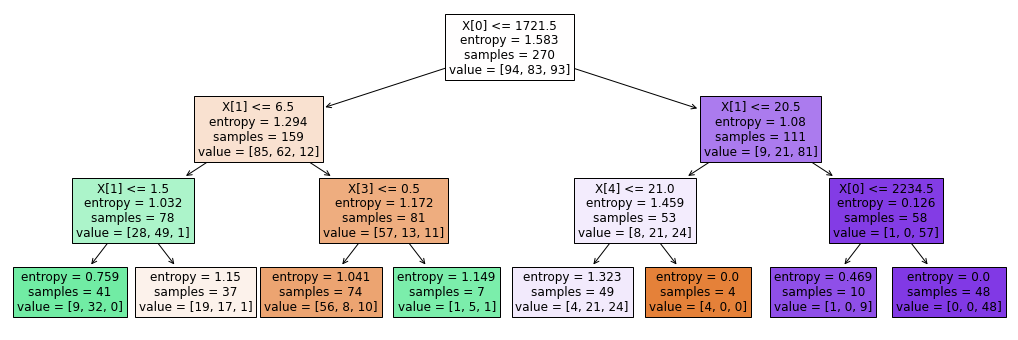

In [102]:
plt.figure(figsize=(18, 6))
tree.plot_tree(clf, filled=True, fontsize=12);

In [183]:
parameters = {'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}

In [186]:
dec_tree = tree.DecisionTreeClassifier()
clf_gs = GridSearchCV(dec_tree, parameters, cv=5)
clf_gs.fit(X_train, y_train)
clf_gs.score(X_test, y_test)

0.7111111111111111

In [187]:
clf_gs.best_params_

{'max_depth': 4}

In [149]:
clf_gs.score(X_test, y_test)

0.7111111111111111

{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 16}

In [132]:
clf_gs.best_score_

0.6962962962962962

In [133]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00207367, 0.00199947, 0.00220103, 0.00200057, 0.00200067,
        0.00180006, 0.00180016, 0.0022007 , 0.00220037, 0.00200067]),
 'std_fit_time': array([7.53005995e-04, 1.19304619e-06, 3.99971150e-04, 6.74349576e-07,
        6.32595976e-07, 4.00662944e-04, 4.00114102e-04, 4.01210785e-04,
        3.99471421e-04, 7.32531142e-07]),
 'mean_score_time': array([0.00140014, 0.00160003, 0.00119967, 0.00140023, 0.0013999 ,
        0.00120044, 0.0010005 , 0.00100036, 0.00140014, 0.00120015]),
 'std_score_time': array([4.89667943e-04, 4.89589937e-04, 4.00090313e-04, 4.89979335e-04,
        4.90154518e-04, 4.00066660e-04, 4.15696997e-07, 3.16297988e-07,
        4.90545137e-04, 4.00090342e-04]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'gini', 'gini', 'gini', 'gini', 'gini'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_val

In [96]:
sorted(clf_gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_splitter',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## module 2 practice

In [5]:
data_tree = pd.read_csv("train_data_tree.csv")
data_tree.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [18]:
data_tree.num.value_counts()

0    128
1    110
Name: num, dtype: int64

In [21]:
0.5*np.log2(0.5) + 0.5*np.log2(0.5)

-1.0

In [22]:
128/238*np.log2(128/238) + 110/238*np.log2(110/238)

-0.9958699965528488

In [6]:
data_tree.describe()

,sex,exang,num
count,238.000000,238.000000,238.000000
mean,0.710084,0.340336,0.462185
std,0.454679,0.474821,0.499619
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [7]:
X = data_tree.loc[:, ['sex', 'exang']]
y = data_tree.num

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

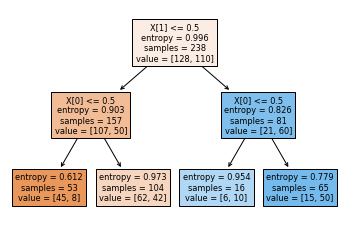

In [13]:
tree.plot_tree(clf, filled=True);

In [23]:
def entropy(a, b):
    p1 = a/(a+b)
    p2 = b/(a+b)
    return -p1*np.log2(p1)-p2*np.log2(p2) 

In [29]:
entropy(128, 110) - entropy(107, 50)*157/238 - entropy(21, 60)*81/238

0.11939340343891597

In [30]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0] # индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
e = clf.tree_.impurity[0] # энтропия корня дерева

average_child_enthropy = (e1*n1/n) + (e2*n2/n)

information_gain = e - average_child_enthropy
information_gain

0.11939340343891591

In [33]:
l_node, r_node

(1, 4)

In [32]:
dir(clf.tree_)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']